<a href="https://colab.research.google.com/github/Emanuel498/AprendoGit/blob/master/Feed_Forward_Network_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Refs.
# https://victorzhou.com/blog/keras-neural-network-tutorial/
# https://wtfleming.github.io/2019/04/21/keras-mnist/

# Preparación de los datos

11493376/11490434 [==============================] - 0s 0us/step
Training dims  (60000, 784)
Testing dims  (10000, 784)


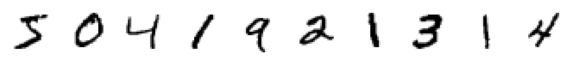

In [ ]:
# Preparing data 
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load mnist data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Display some images
_, ax = plt.subplots(1, 10, figsize=(10,10))
for i in range(0, 10):
    ax[i].axis('off')
    ax[i].imshow(train_images[i], cmap=plt.cm.binary)

# Image Normalization
# Centered data simplifies learning.
train_samples = (train_images / 255.0) - 0.5
test_samples = (test_images / 255.0) - 0.5

# Flatten the images.
train_samples = train_samples.reshape((-1, 784))
test_samples = test_samples.reshape((-1, 784))

print("Training dims ", train_samples.shape) # (60000, 784)
print("Testing dims ", test_samples.shape)  # (10000, 784)

# Creación de la red neuronal y entrenamiento

In [ ]:
# Model creation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.utils import to_categorical

# Model
model = Sequential()
model.add( Dense(16, activation='relu', input_shape=(784,)) )
model.add( Dense(10, activation='softmax') )

# Display model details
model.summary()

# Model optimization
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training
history = model.fit(
    train_samples,
    to_categorical(train_labels),
    epochs=100,
    batch_size=32,
    validation_data=(test_samples,to_categorical(test_labels))
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5055 - accuracy: 0.8521 - val_loss: 0.3273 - val_accuracy: 0.9048
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3267 - accuracy: 0.9047 - val_loss: 0.3122 - val_accuracy: 0.9063
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3032 - accuracy: 0.9119 - val_loss: 0.2835 - val_accuracy: 0.9194
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.

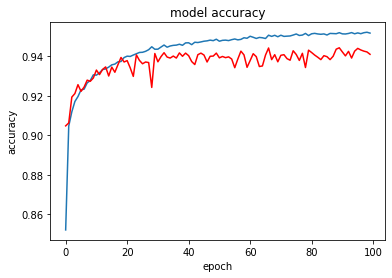

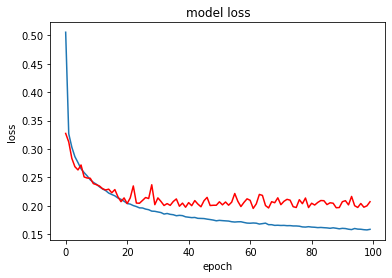

In [ ]:
# Visualization of training results
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],'r')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],'r')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

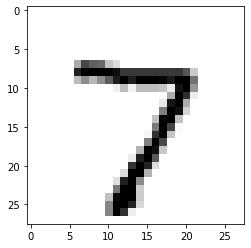

[1.0474566e-08 2.7380063e-08 2.9864657e-06 2.1921824e-05 2.1879798e-09
 1.1823957e-08 4.8863139e-16 9.9997461e-01 1.5440948e-08 5.1571021e-07]


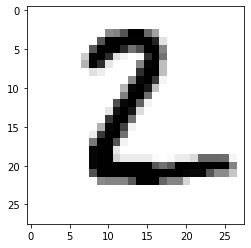

[1.3871866e-08 2.8576438e-05 9.9995589e-01 1.5322334e-05 2.5502319e-14
 1.4783998e-08 1.5382480e-07 6.4268374e-12 7.8025650e-08 2.4391756e-16]


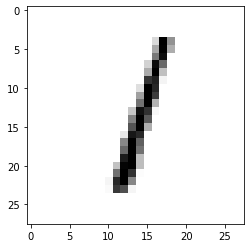

[5.5865195e-07 9.9912506e-01 1.3094218e-04 2.0308494e-06 3.2072181e-05
 1.1803427e-06 5.6614322e-06 4.4660136e-04 2.5556213e-04 2.8834214e-07]


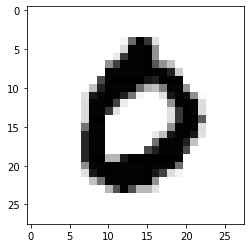

[9.9915767e-01 3.5520875e-06 7.2969130e-04 8.5729935e-06 7.1601528e-07
 9.4535295e-07 8.9056695e-05 8.3933501e-06 9.9435944e-08 1.3305195e-06]


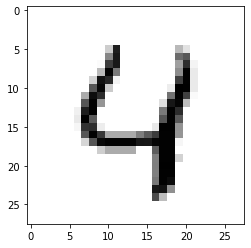

[2.1235476e-09 1.3310498e-11 4.0597650e-09 3.3968935e-11 9.9998558e-01
 8.5666259e-11 3.5058648e-08 1.6520135e-06 2.4176303e-09 1.2720374e-05]


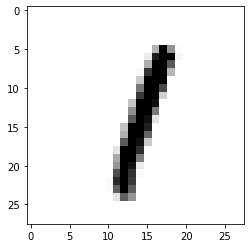

[1.1575304e-08 9.9806696e-01 3.2872017e-06 2.2676447e-08 2.9733910e-05
 6.8630573e-10 1.2478298e-08 1.8963297e-03 3.5912917e-06 5.6535030e-09]


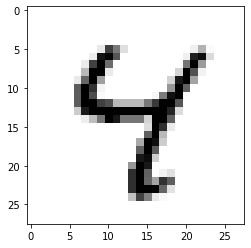

[3.5528075e-13 1.2715543e-09 6.1926886e-10 3.7470271e-09 9.9996436e-01
 9.6834526e-08 1.7786127e-10 8.7384078e-06 2.0946702e-05 5.9062322e-06]


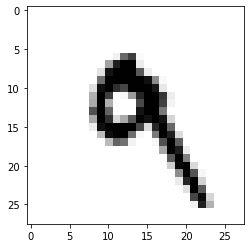

[1.1264090e-09 4.9636597e-05 2.1804255e-05 1.1938794e-03 8.5736142e-04
 4.4470731e-08 3.0616151e-10 1.7438756e-04 2.7579424e-06 9.9770015e-01]


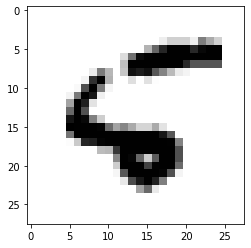

[1.9522378e-05 4.0855111e-06 7.2366059e-02 1.1734336e-06 4.7612502e-03
 2.7277622e-01 5.7550180e-01 8.7745328e-05 7.4417740e-02 6.4437278e-05]


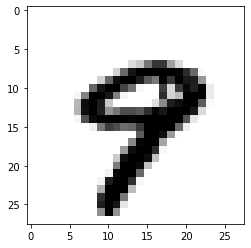

[7.3522597e-09 3.9073571e-12 9.1003916e-10 6.6831106e-08 1.1743855e-01
 4.8641464e-09 2.3402736e-14 3.6239363e-03 4.1242657e-04 8.7852496e-01]


In [ ]:
# Visualization of some testing images

# Prediction for the first 10 images of test set
predictions = model.predict(test_samples[:10])

for i in range(0, 10):
  plt.figure()
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  plt.show()
  print( predictions[i] )

# Ejercicio 1

Modifique la red de la sección anterior para que tenga dos capas ocultas de 128 neuronas cada una. Observe y discuta la evolución de la función de loss y accuracy tanto en training como en validation. Analice las funciones de activación utilizadas. 


# Ejercicio 2

Implemente una red neuronal que permita clasificar las imágenes del dataset que se describe en: https://keras.io/api/datasets/cifar10/